In [64]:
import numpy as np
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt

import os
print(os.listdir("Amazon"))

['Books_5.json', 'data.csv', 'reviews_Books_5.json', 'reviews_Books_5.json.gz']


In [30]:
file = glob.glob('Amazon/Books_5.json')

In [31]:
review=[]
with open(file[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        review.append(i)
        
# Making a list of Tuples containg all the data of json files.
reviewDataframe=[]
for x in review:
    try:
        jdata=json.loads(x)
        reviewDataframe.append((jdata['reviewerID'], jdata['asin'],jdata['reviewText'],jdata['overall'])) 
    except: 
        pass        
    
# Creating a dataframe using the list of Tuples got in the previous step.    
dataset=pd.DataFrame(reviewDataframe,columns=['Reviewer_ID', 'Asin','Review_Text','Rating'])

In [4]:
rating = dataset["Rating"]

In [6]:
rating[:200]

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
195    5.0
196    5.0
197    5.0
198    1.0
199    5.0
Name: Rating, Length: 200, dtype: float64

In [7]:
dataset['Rating'].value_counts()

5.0    4980815
4.0    2223094
3.0     955189
2.0     415110
1.0     323833
Name: Rating, dtype: int64

In [32]:
Overall_Rating=dataset.groupby(['Rating'])['Reviewer_ID'].count().reset_index()

In [33]:
Overall_Rating=Overall_Rating.rename(columns={'Reviewer_ID':'Number_of_Reviews'})

In [34]:
Overall_Rating

,Rating,Number_of_Reviews
0,1.0,323833
1,2.0,415110
2,3.0,955189
3,4.0,2223094
4,5.0,4980815


In [35]:
AvgRatingProd=dataset.groupby('Asin')['Rating'].mean().reset_index()

In [60]:
result_AvgRatingProd=AvgRatingProd.groupby(pd.cut(AvgRatingProd.Rating,np.arange(0, 5.1, 1))).count()
result_AvgRatingProd=result_AvgRatingProd.rename(columns={'Rating':'Count'})
result_AvgRatingProd=result_AvgRatingProd.reset_index()

In [61]:
result_AvgRatingProd[['Rating','Count']]

,Rating,Count
0,"(0.0, 1.0]",51
1,"(1.0, 2.0]",846
2,"(2.0, 3.0]",9294
3,"(3.0, 4.0]",94147
4,"(4.0, 5.0]",263644


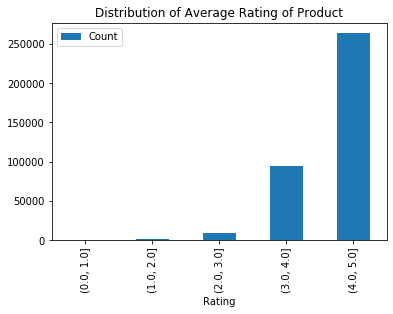

In [65]:
result_AvgRatingProd.plot(x="Rating",y="Count",kind="bar",title="Distribution of Average Rating of Product")
plt.show()

In [85]:
df5 = dataset[dataset['Rating'] == 5.0] [: 200]
df4 = dataset[dataset['Rating'] == 4.0] [: 200]
df3 = dataset[dataset['Rating'] == 3.0] [: 200]
df2 = dataset[dataset['Rating'] == 2.0] [: 200]
df1 = dataset[dataset['Rating'] == 1.0] [: 200]
    

In [87]:
df1

,Reviewer_ID,Asin,Review_Text,Rating
80,A9WX8DK93SN5,000100039X,As Amin Rihani described his own friend Gibran...,1.0
121,A3HLNFF21USD1K,000100039X,I appreciate getting the book at the great pri...,1.0
146,A14A2VLURI8DGP,000100039X,"This man was a son of a pastor, but worshipped...",1.0
148,AD6E4Y092Y4KP,000100039X,"You've got to be kidding, all you 5 star revie...",1.0
159,ALD1CRUBY1365,000100039X,This book was a philosophical touchstone for i...,1.0
...,...,...,...,...
5067,A3KXNU7J7X6RBY,0002247399,"For a 5 book series, with a huge cast of chara...",1.0
5076,A3GCK6ILEXNTDU,0002247399,Martin continues his tradition of dragging out...,1.0
5081,A36G9PDHFPWG5D,0002247399,Books 1-3 were engrossing and broke so many ac...,1.0
5089,A1GXOPDPVWA3U9,0002247399,I have to preface by saying I loved book 1 but...,1.0
